 Data Loading

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
url = 'C:/Users/Dell/tested.csv'
df = pd.read_csv(url)

# Display the first few rows to understand the structure and types of data
print(df.head())
print(df.info())

   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (

Data Cleaning

In [38]:
# Handle Missing Values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Cabin'].fillna('Unknown', inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Remove Duplicates
df.drop_duplicates(inplace=True)

# Correct Data Types
df['Sex'] = df['Sex'].astype('category')
df['Embarked'] = df['Embarked'].astype('category')

# Verify changes
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Survived     418 non-null    int64   
 2   Pclass       418 non-null    int64   
 3   Name         418 non-null    object  
 4   Sex          418 non-null    category
 5   Age          418 non-null    float64 
 6   SibSp        418 non-null    int64   
 7   Parch        418 non-null    int64   
 8   Ticket       418 non-null    object  
 9   Fare         417 non-null    float64 
 10  Cabin        418 non-null    object  
 11  Embarked     418 non-null    category
dtypes: category(2), float64(2), int64(5), object(3)
memory usage: 33.9+ KB
None


 Univariate Analysis

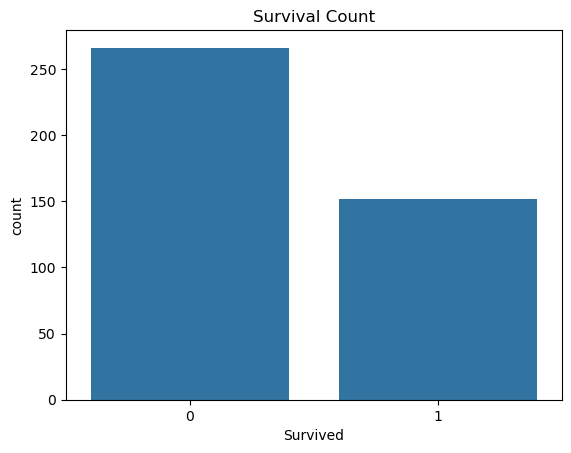

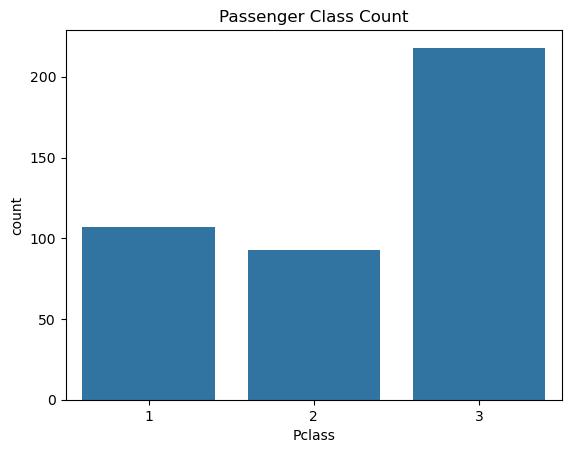

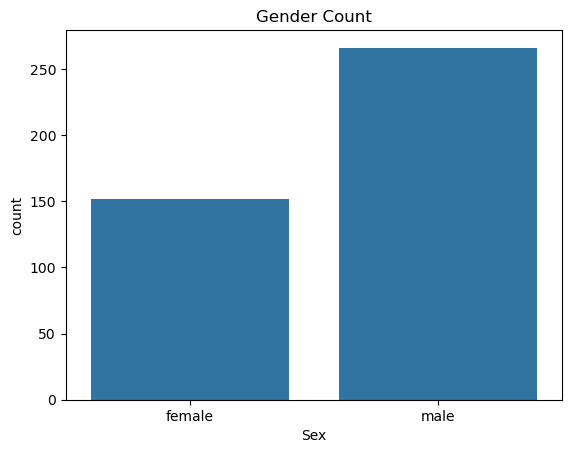

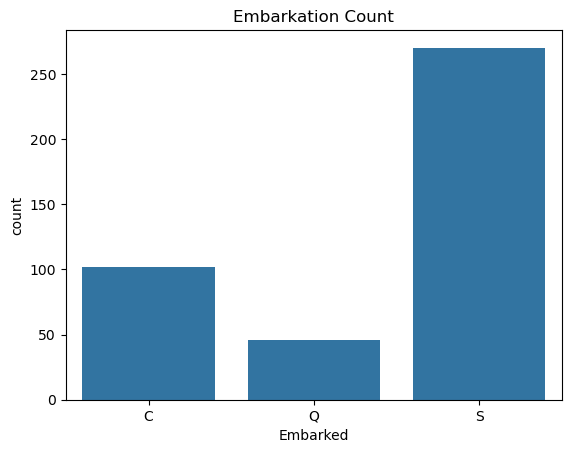

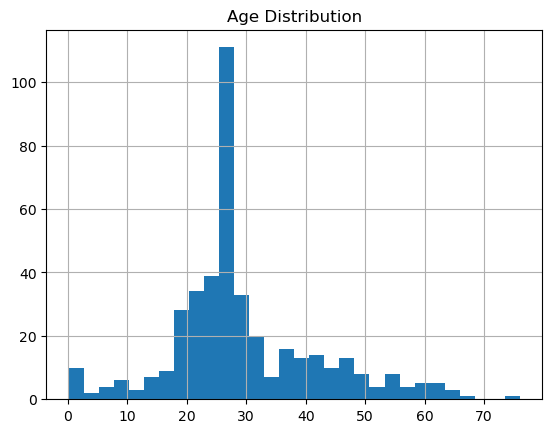

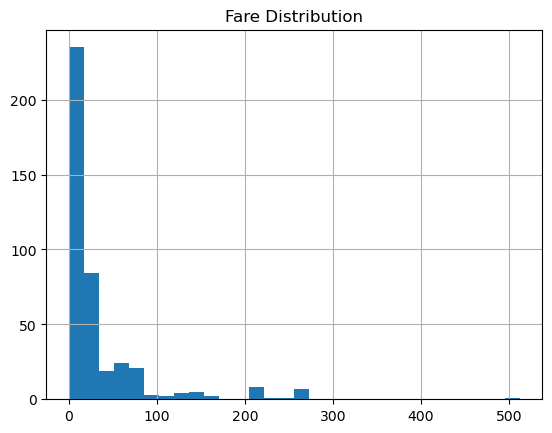

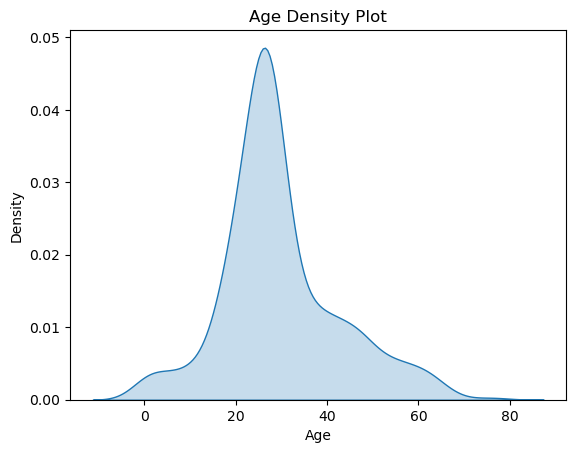

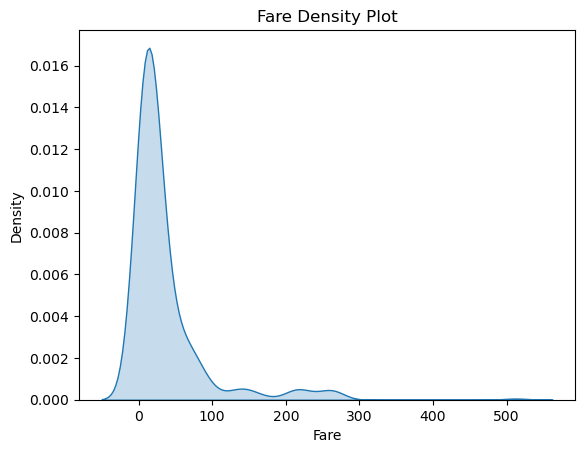

In [40]:
# Categorical Features
import matplotlib.pyplot as plt
import seaborn as sns

# Save count plot - Survival Count
sns.countplot(data=df, x='Survived')
plt.title('Survival Count')
plt.savefig("survival_count.png", dpi=300, bbox_inches="tight")  # Save the image
plt.show()

# Save count plot - Passenger Class Count
sns.countplot(data=df, x='Pclass')
plt.title('Passenger Class Count')
plt.savefig("passenger_class_count.png", dpi=300, bbox_inches="tight")
plt.show()

# Save count plot - Gender Count
sns.countplot(data=df, x='Sex')
plt.title('Gender Count')
plt.savefig("gender_count.png", dpi=300, bbox_inches="tight")
plt.show()

# Save count plot - Embarkation Count
sns.countplot(data=df, x='Embarked')
plt.title('Embarkation Count')
plt.savefig("embarkation_count.png", dpi=300, bbox_inches="tight")
plt.show()

# Save histogram - Age Distribution
df['Age'].hist(bins=30)
plt.title('Age Distribution')
plt.savefig("age_distribution.png", dpi=300, bbox_inches="tight")
plt.show()

# Save histogram - Fare Distribution
df['Fare'].hist(bins=30)
plt.title('Fare Distribution')
plt.savefig("fare_distribution.png", dpi=300, bbox_inches="tight")
plt.show()

# Save KDE plot - Age Density Plot
sns.kdeplot(df['Age'], shade=True)
plt.title('Age Density Plot')
plt.savefig("age_density_plot.png", dpi=300, bbox_inches="tight")
plt.show()

# Save KDE plot - Fare Density Plot
sns.kdeplot(df['Fare'], shade=True)
plt.title('Fare Density Plot')
plt.savefig("fare_density_plot.png", dpi=300, bbox_inches="tight")
plt.show()


 Bivariate Analysis

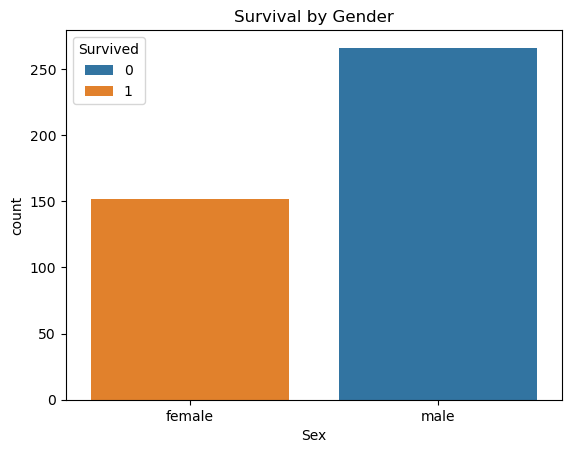

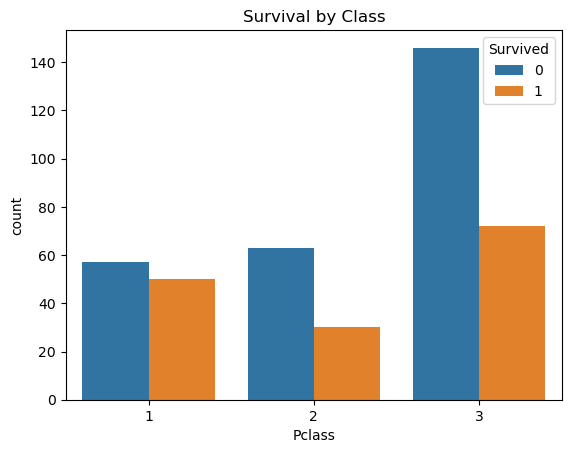

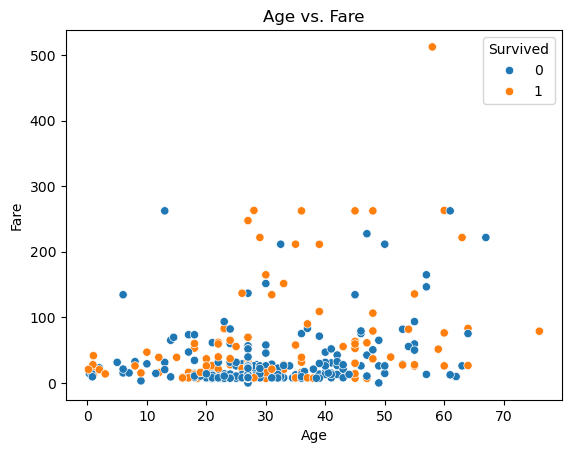

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Survival by Gender
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title('Survival by Gender')
plt.savefig("survival_by_gender.png", dpi=300, bbox_inches="tight")  # Save image
plt.show()

# Survival by Class
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title('Survival by Class')
plt.savefig("survival_by_class.png", dpi=300, bbox_inches="tight")
plt.show()

# Age vs. Fare
sns.scatterplot(data=df, x='Age', y='Fare', hue='Survived')
plt.title('Age vs. Fare')
plt.savefig("age_vs_fare.png", dpi=300, bbox_inches="tight")
plt.show()


 Multivariate Analysis

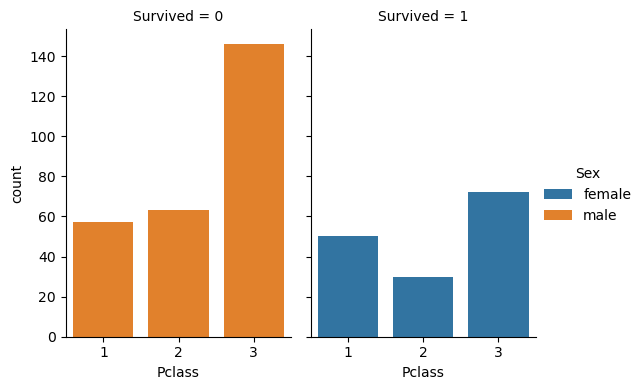

In [44]:

# Survival by Gender and Class
g = sns.catplot(data=df, x='Pclass', hue='Sex', col='Survived', kind='count', height=4, aspect=0.7)

# Save the plot
g.savefig("survival_by_gender_and_class.png", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()


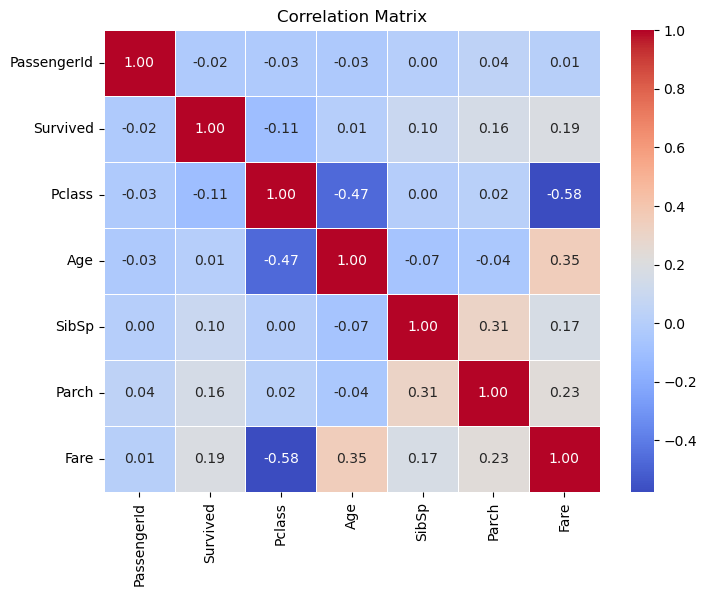

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the 'Sex' column is encoded as numeric
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Calculate correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))  # Adjust figure size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')

# Save the heatmap as an image
plt.savefig("correlation_matrix.png", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()


Feature Engineering

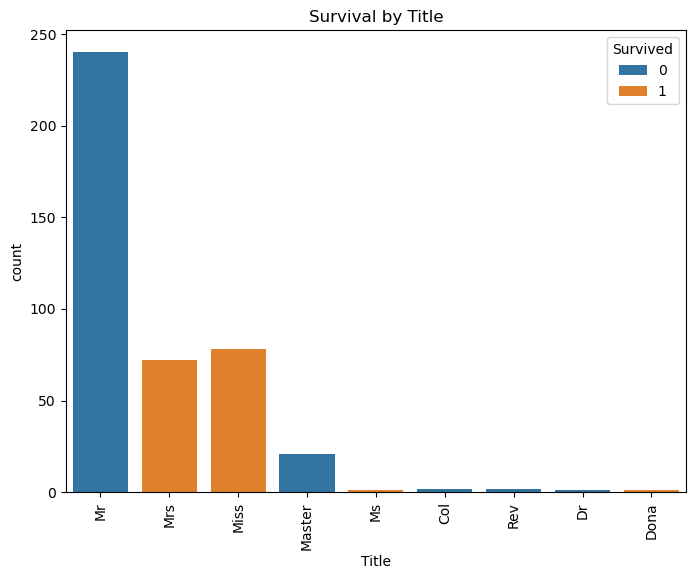

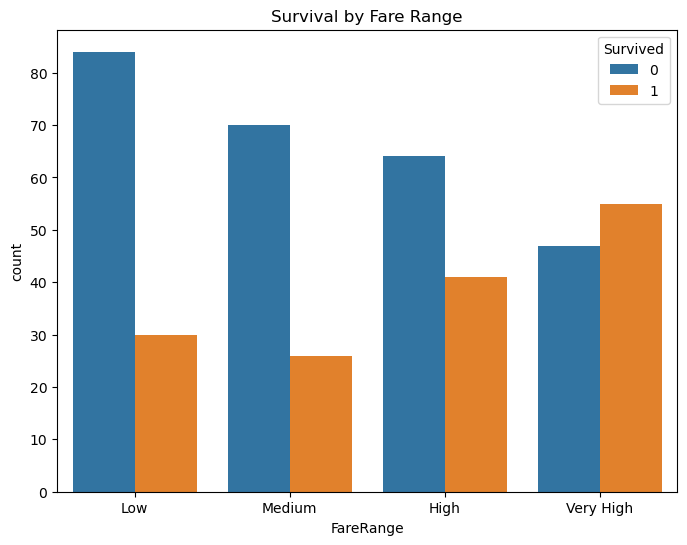

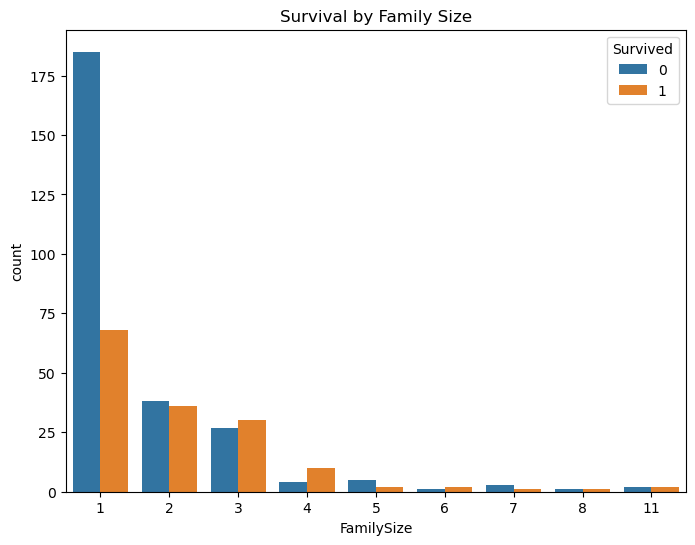

In [52]:

# Extract titles from Name
df['Title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

# Group Fare into ranges
df['FareRange'] = pd.qcut(df['Fare'], 4, labels=['Low', 'Medium', 'High', 'Very High'])

# Create a family size feature
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# ---- Save Visualizations ---- #

# Survival by Title
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Title', hue='Survived')
plt.title('Survival by Title')
plt.xticks(rotation=90)
plt.savefig("survival_by_title.png", dpi=300, bbox_inches="tight")  # Save image
plt.show()

# Survival by Fare Range
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='FareRange', hue='Survived')
plt.title('Survival by Fare Range')
plt.savefig("survival_by_fare_range.png", dpi=300, bbox_inches="tight")
plt.show()

# Survival by Family Size
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='FamilySize', hue='Survived')
plt.title('Survival by Family Size')
plt.savefig("survival_by_family_size.png", dpi=300, bbox_inches="tight")
plt.show()


 Insights and Conclusions

In [54]:
# Summary of key findings
print("Insights and Conclusions:")
print("1. Females had a higher survival rate than males.")
print("2. Passengers in first class were more likely to survive than those in third class.")
print("3. Younger passengers had a higher survival rate.")
print("4. Passengers with smaller family sizes were more likely to survive.")

Insights and Conclusions:
1. Females had a higher survival rate than males.
2. Passengers in first class were more likely to survive than those in third class.
3. Younger passengers had a higher survival rate.
4. Passengers with smaller family sizes were more likely to survive.
